In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

import neuraltda.stimulus_space as ss
import neuraltda.pyslsa_environments as penv

/home/alex/DailyLog/20180605/


In [2]:
L = 2 # meter
v = 0.1

hole_rad = 0.3
nsecs = 40*60
fs = 10
ncells = 100
ntrials = 1

max_rate_hz = 4 # spikes/ second
sigma = 0.1

max_hole = 5
nrepeats = 1
exclusion_param = 1.05 # how far away centers of pfs must be as a multiple of hole radius. 

windt = 100.0
thresh = 6.0
period = [0,0]
dtovr = 5.0

In [3]:
test = penv.EnvironmentSimulation(L, v, hole_rad, nsecs, fs, ncells, ntrials, max_rate_hz, sigma, max_hole, nrepeats, exclusion_param)

Generating environments...
Generating Place Fields...
Generating spikes...
Steps to go: 20000
Steps to go: 10000
Steps to go: 10000
Steps to go: 20000
Steps to go: 10000
Steps to go: 20000
Steps to go: 10000
Steps to go: 20000
Steps to go: 10000
Steps to go: 20000
Steps to go: 10000
Steps to go: 10000


In [4]:
test.compute_simplicial_complexes(windt, dtovr, thresh)

Binning data...
Nreps = 1
skip = 1
dur = 24000.0
nwins = 24000
Computing simplicial complexes...
Binning data...
Nreps = 1
skip = 1
dur = 24000.0
nwins = 24000
Computing simplicial complexes...
Binning data...
Nreps = 1
skip = 1
dur = 24000.0
nwins = 24000
Computing simplicial complexes...
Binning data...
Nreps = 1
skip = 1
dur = 24000.0
nwins = 24000
Computing simplicial complexes...
Binning data...
Nreps = 1
skip = 1
dur = 24000.0
nwins = 24000
Computing simplicial complexes...


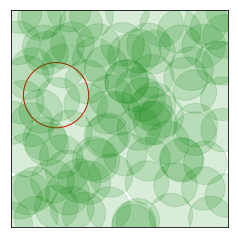

In [5]:
env_num = 1
penv.plot_environment(test.envs[env_num], test.fields, test.sigmaL)

In [6]:
g = test.graphs[env_num][0]

In [8]:
%%timeit
embd_numerical = ss.mds_embed(g)

1min 20s ± 11.3 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
#%%timeit
embd_classic = ss.classic_mds_embed(g)

NameError: name 'embd_classic' is not defined

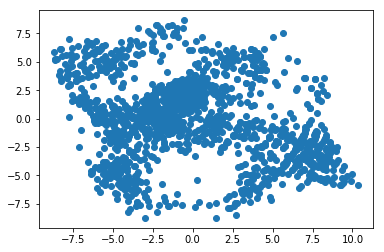

In [10]:
fig, ax = plt.subplots()
x = np.array(embd_numerical[0][:, 0])
y = np.array(embd_numerical[0][:, 1])
plt.scatter(x, y)

x = np.array(embd_classic[0][:, 0])
y = np.array(embd_classic[0][:, 1])
plt.scatter(x, y)

In [12]:
embd_numerical

(array([[ 5.83530826, -1.41642626],
        [ 7.29520473, -2.97640052],
        [ 6.46520127, -4.05611191],
        ..., 
        [-1.14436488,  3.06101329],
        [-0.75631513,  3.1097721 ],
        [-2.50181317,  0.60503698]]),
 matrix([[  0.        ,   2.        ,   2.        , ...,   8.44077557,
            8.44077557,   9.0690941 ],
         [  2.        ,   0.        ,   2.        , ...,  10.44077557,
           10.44077557,  11.0690941 ],
         [  2.        ,   2.        ,   0.        , ...,  10.44077557,
           10.44077557,  11.0690941 ],
         ..., 
         [  8.44077557,  10.44077557,  10.44077557, ...,   0.        ,
            1.65508332,   2.76650673],
         [  8.44077557,  10.44077557,  10.44077557, ...,   1.65508332,
            0.        ,   3.67822711],
         [  9.0690941 ,  11.0690941 ,  11.0690941 , ...,   2.76650673,
            3.67822711,   0.        ]]),
 [(90,),
  (88,),
  (32,),
  (65,),
  (67,),
  (1,),
  (34,),
  (10,),
  (53,),
  (28,),
  